<h4 style="color:purple">Group No#3 <br> Nasir Hussain 04072013040 <br> Ahsan Raza 04072013023</h4>

<center>
<h3 style="color:purple">Introduction to Data Mining</h3>
<h4 style="color:purple">Assignment : 3 </h4>
</center>

In [63]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:purple">Task 1 : Select Attributes</h2>

<p style="color:orchid"><b>Select attributes according to your group number in the following manner: The dataset has 31 attributes (1-31), and one class label (attribute 32). Group1 should use attributes 1-6, Group 2 attributes 2-7, and so on. Do not use attribute 31.</b></p>

In [64]:
df=pd.read_csv("DATA.csv")
df.head(3)

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1


<p style="color:orchid"><b>FOR GROUP NO : 3 Attributes(3-8)</b></p>

In [4]:
df1 = df.iloc[:, list(range(3, 9)) + [32]]
df1.head()

,3,4,5,6,7,8,GRADE
0,3,3,1,2,2,1,1
1,3,3,1,2,2,1,1
2,2,3,2,2,2,2,1
3,1,3,1,2,1,2,1
4,1,3,2,2,1,3,1


<h3 style="color:purple">Attribute Descriptions</h3>

<ul style="color:blue">
    <li>3- Graduated high-school type: (1: private, 2: state, 3: other)</li>
<li>4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)</li>
<li>5- Additional work: (1: Yes, 2: No)</li>
<li>6- Regular artistic or sports activity: (1: Yes, 2: No)</li>
<li>7- Do you have a partner: (1: Yes, 2: No)</li>
<li>8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)</li>
<li>32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)</li>
</p>

In [5]:
new_column_names = {
    '3': 'High-School',
    '4': 'Scholarship',
    '5': 'Add-Work',
    '6': 'Co-Curricular',
    '7': 'Partner',
    '8': 'Salary'
}

In [6]:
df2=df1.rename(columns=new_column_names)
df2.head(3)

,High-School,Scholarship,Add-Work,Co-Curricular,Partner,Salary,GRADE
0,3,3,1,2,2,1,1
1,3,3,1,2,2,1,1
2,2,3,2,2,2,2,1


In [7]:
df2.describe()

,High-School,Scholarship,Add-Work,Co-Curricular,Partner,Salary,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,3.227586
std,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000
75%,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,5.000000
max,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,7.000000


<br>

<h2 style="color:purple">Task 2 : CLASSIFICATION</h2>

<p style="color:orchid"><b>You have to carry out classification,<br>
a) Carry out classification by selecting two classification algorithms that you have studied in class. Justify your choice<br>
b) Evaluate the results of classification using precision and recall</b></p>

In [8]:
inputs=df2[['High-School','Scholarship','Add-Work','Co-Curricular','Partner','Salary']]
target=df2.GRADE

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)

In [10]:
from sklearn.model_selection import cross_val_score

<h3 style="color:RED">ALG 1 : DECISION TREE</h3>

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
scores = cross_val_score(model, inputs, target, cv=5)
np.average(scores)

0.21379310344827585

In [13]:
myClasses = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']

Text(0.5, 1.0, 'Confusion Matrix')

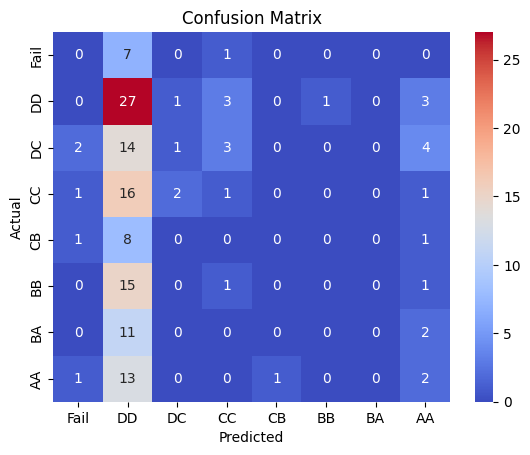

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred_dt = cross_val_predict(model, inputs, target, cv=5)
cm = confusion_matrix(target, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=myClasses, yticklabels=myClasses)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [49]:
precision = cross_val_score(model, inputs, target, cv=5, scoring='precision_macro')
recall = cross_val_score(model, inputs, target, cv=5, scoring='recall_macro')
import warnings
warnings.filterwarnings("ignore")

In [16]:
precision_dt=np.average(precision)
precision_dt

0.04828553391053391

<p style="color:blue">The precision value of 0.04828553391053391 indicates that just about 4.8% of the samples projected as positive were actually true positives. This shows a low precision, implying that the forecasts have a relatively high probability of false positives.</p>

In [17]:
recall_dt=np.average(recall)
recall_dt

0.12434523809523808

<p style="color:blue">With a recall value of 0.12434523809523808, this means that the model accurately recognised just about 12.4% of the real positive samples. This implies a low recall, which means that a considerable number of positive samples are misclassified as negatives. (false negatives).</p>

<h3 style="color:RED">ALG 2 : NAIVE BAYES</h3>

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [51]:
gnb.fit(x_train,y_train)

GaussianNB()

In [52]:
gnb.score(x_train,y_train)

0.27586206896551724

Text(0.5, 1.0, 'Confusion Matrix')

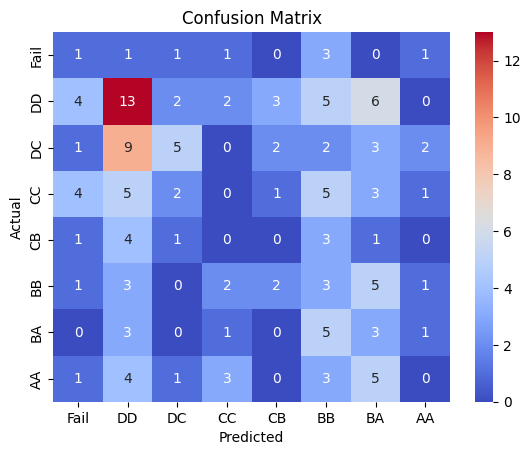

In [53]:
y_pred_nb = cross_val_predict(gnb, inputs, target, cv=5)
cm1 = confusion_matrix(target, y_pred_nb)
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm', xticklabels=myClasses, yticklabels=myClasses)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [54]:
precision_nb = cross_val_score(gnb, inputs, target, cv=5, scoring='precision_macro')
recall_nb = cross_val_score(gnb, inputs, target, cv=5, scoring='recall_macro')
import warnings
warnings.filterwarnings("ignore")

In [55]:
precision_nb=np.average(precision_nb)
precision_nb

0.13352591852591852

<p style="color:blue">The precision value of 0.13352591852591852 indicates that just about 13.4% of the samples projected as positive were actually true positives. This shows a low precision, implying that the forecasts have a relatively high probability of false positives</p>

In [56]:
recall_nb=np.average(recall_nb)
recall_nb

0.13601190476190478

<p style="color:blue">With a recall value of 0.13601190476190478, this means that the model accurately recognised just about 13.6% of the real positive samples. This implies a low recall, which means that a considerable number of positive samples are misclassified as negatives. (false negatives)..</p>

<br>

<h2 style="color:purple">Task 2 : CLUSTERING</h2>

<p style="color:orchid"><b>You have to carry out clustering,<br>
a) Carry out clustering by selecting two clustering algorithms that you have studied in class. Justify your choice<br>
b) Evaluate the results of clustering using precision and recall</b></p>

In [25]:
from sklearn.cluster import KMeans

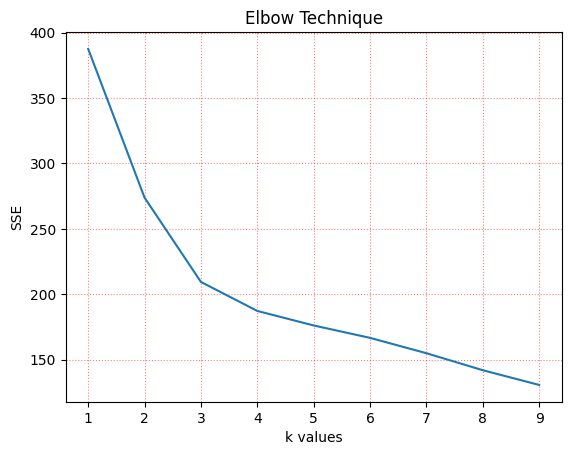

In [26]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(inputs)
    sse.append(km.inertia_)
    

plt.plot(k_rng,sse)
plt.xlabel("k values")
plt.ylabel("SSE")
plt.title("Elbow Technique")
plt.grid(color="red",linestyle=":",alpha=0.5)
import warnings
warnings.filterwarnings('ignore')

In [57]:
myClasses2 = ['C0', 'C1', 'C2','C3', 'C4', 'C5','C6', 'C7']

<h3 style="color:RED">ALG 1 : PARTITIONING-BASE K_MEAN</h3>

In [58]:
k_clusters = 8
kmeans = KMeans(n_clusters=k_clusters, random_state=39)
kmeans.fit(inputs)
centroids = kmeans.cluster_centers_

cluster_groups = kmeans.labels_
print(cluster_groups)

[0 0 1 1 1 1 3 0 5 1 1 4 3 3 4 7 2 7 1 1 3 3 0 6 1 7 5 0 7 3 2 0 1 0 1 4 1
 0 3 7 1 1 5 7 7 6 7 7 5 1 1 0 1 1 1 6 5 0 1 5 6 1 7 1 3 1 7 1 3 3 5 3 5 3
 3 3 1 1 3 3 0 0 1 1 1 3 3 1 5 7 5 2 7 0 7 2 5 3 3 7 3 1 7 6 7 3 3 3 2 5 1
 2 0 7 4 3 3 5 2 3 0 0 2 1 5 2 4 3 5 0 0 2 2 3 3 0 0 2 6 1 0 3 3 6 4]


In [59]:
df3=df2.copy()
df3['Student_Group']=cluster_groups
df3.head()

,High-School,Scholarship,Add-Work,Co-Curricular,Partner,Salary,GRADE,Student_Group
0,3,3,1,2,2,1,1,0
1,3,3,1,2,2,1,1,0
2,2,3,2,2,2,2,1,1
3,1,3,1,2,1,2,1,1
4,1,3,2,2,1,3,1,1


In [60]:
from sklearn.decomposition import PCA
redPCA = PCA(n_components=2)
redData = redPCA.fit_transform(inputs)

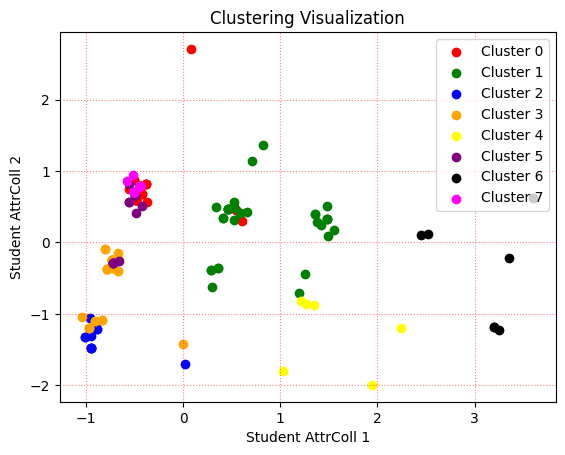

In [61]:
cluster_colors = ['red', 'green', 'blue','orange', 'yellow', 'purple','black','magenta']
for label in set(cluster_groups):
    cluster_data = redData[cluster_groups == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=cluster_colors[label], label=f'Cluster {label}')

plt.xlabel('Student AttrColl 1')
plt.ylabel('Student AttrColl 2')
plt.title('Clustering Visualization')
plt.legend()
plt.grid(color="red",linestyle=":",alpha=0.5)
plt.show()

In [62]:
from sklearn.metrics import silhouette_score
silhouette_km = silhouette_score(inputs, cluster_groups)
silhouette_km

0.20038511425215916

<br>

<br>

<CENTER><h6 style="color:red">--------------UNGRADED PART---------------</H6></CENTER>

Text(0.5, 1.0, 'Confusion Matrix')

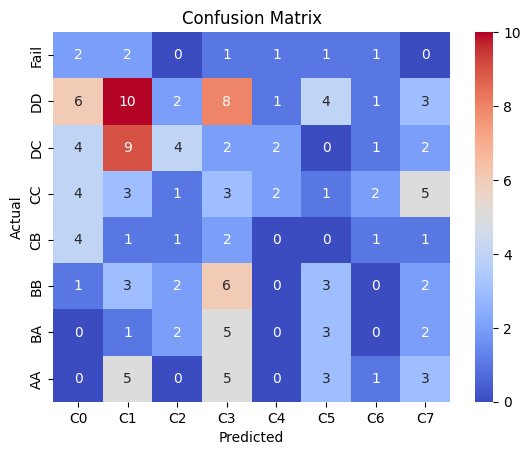

In [33]:
cm2 = confusion_matrix(target, cluster_groups)
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm', xticklabels=myClasses2, yticklabels=myClasses)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [34]:
precision_km = []
recall_km = []
a=0
for i in range(k_clusters):
    TP = cm2[i, i]
    FP = np.sum(cm2[:, i]) - TP
    FN = np.sum(cm2[i, :]) - TP
    
    p = TP / (TP + FP)
    r = TP / (TP + FN)
    
    precision_km.append(p)
    recall_km.append(r)

In [35]:
precision_km=np.mean(precision_km)
precision_km

0.14788821778711486

In [36]:
recall_km=np.mean(recall_km)
recall_km

0.14977240896358543

<br>

<h3 style="color:RED">ALG 2 : HIERARCHICAL-BASE AgglomerativeClustering</h3>

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
agglo = AgglomerativeClustering(n_clusters=None, distance_threshold=2)
cluster_groupsAgg = agglo.fit_predict(inputs)
print(cluster_groupsAgg)

[18 18 31 11  8 31 28 11  2  8  8  5  7 19  5 22 21 22 10 14 15 15  3  9
 31 24  2 13 24 16 12 13 31  3 14 10  4 11 19 24  7 13  1 24  2 32 24 24
  2  7 14 18 13 26 27 32  1 25  8  2  9 26 22  6 19  8 24  4 20  6 29 16
  2 28 28 30  1 14 20 28  3 13  6 27  4 19 28 26 29 22  2 12 22 17 24 12
 29 20 30 22 28  6 24  0 22 20 30 20 23  1 31 23 18 16  5 15 19  1 21 30
 11  3 21 27  3 12  5 28 29 25 25 23 23 15 30 25  3 23  0  6 25 28  7  0
 10]


In [39]:
total_clusters = len(set(cluster_groupsAgg))
print("Total number of clusters:", total_clusters)

Total number of clusters: 33


In [40]:
df4=df2.copy()
df4['Student_Group']=cluster_groupsAgg
df4.head()

,High-School,Scholarship,Add-Work,Co-Curricular,Partner,Salary,GRADE,Student_Group
0,3,3,1,2,2,1,1,18
1,3,3,1,2,2,1,1,18
2,2,3,2,2,2,2,1,31
3,1,3,1,2,1,2,1,11
4,1,3,2,2,1,3,1,8


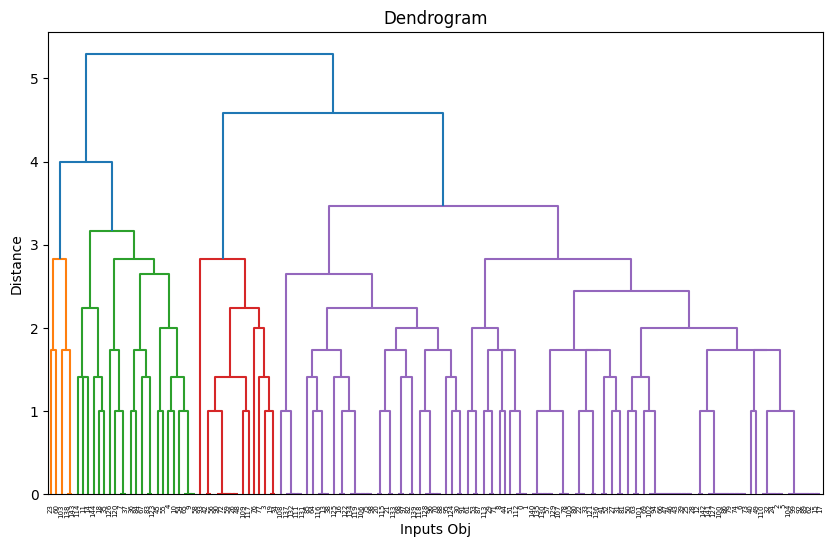

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

dend = linkage(inputs, method='complete', metric='euclidean')
plt.figure(figsize=(10, 6))
dendrogram(dend)
plt.xlabel('Inputs Obj')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [42]:
silhouette_agg = silhouette_score(inputs, cluster_groupsAgg)
silhouette_agg

0.5166066720141106

<br><br>

<CENTER><h6 style="color:red">--------------UNGRADED PART---------------</H6></CENTER>

In [44]:
precision_ag = []
recall_ag = []
a=0
for i in range(k_clusters):
    TP = cm3[i, i]
    FP = np.sum(cm3[:, i]) - TP
    FN = np.sum(cm3[i, :]) - TP
    
    p = TP / (TP + FP)
    r = TP / (TP + FN)
    
    precision_ag.append(p)
    recall_ag.append(r)

In [45]:
precision_ag=np.mean(precision_ag)
precision_ag

0.13333333333333333

In [46]:
recall_ag=np.mean(recall_ag)
recall_ag

0.03467261904761905

<h4 style="color:red">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>
<center><h1 style="color:purple">END OF ASSIGNMENT</H1></CENTER>
<h4 style="color:red">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>